In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

sns.set_style("ticks")

In [2]:
x = np.array([7,20,13,59,40,51,37])
y = np.array([7,6,8,1,3,2,3])

Mean

In [3]:
type(x)

numpy.ndarray

In [4]:
x.mean()

32.42857142857143

In [5]:
y.mean()

4.285714285714286

Variance

In [6]:
ddof = 1

In [7]:
x.var(ddof=ddof)

384.61904761904754

In [8]:
y.var(ddof=ddof)

7.238095238095238

Standard Deviation

In [9]:
x.std(ddof=ddof)

19.611706902231827

In [10]:
np.sqrt(x.var(ddof=ddof))

19.611706902231827

In [11]:
y.std(ddof=ddof)

2.690370836538197

In [12]:
np.sqrt(y.var(ddof=ddof))

2.690370836538197

Covariance

In [13]:
cov = np.cov(x,y,ddof=ddof)[1,0]
cov

-51.3095238095238

Correlation (Pearson)

In [14]:
cov / (np.sqrt(x.var(ddof=ddof) * y.var(ddof=ddof)))

-0.9724570819188173

In [15]:
np.corrcoef(x,y)

array([[ 1.        , -0.97245708],
       [-0.97245708,  1.        ]])

Regression coefficients

First manually

In [16]:
beta_1 = cov / x.var(ddof=ddof)
beta_1

-0.13340349139532007

In [17]:
beta_0 = y.mean() - beta_1 * x.mean()
beta_0

8.611798935248236

In [18]:
df = pd.DataFrame({"y": y, "x": x})
df

,y,x
0,7,7
1,6,20
2,8,13
3,1,59
4,3,40
5,2,51
6,3,37


In [19]:
# add constant column
df = sm.add_constant(df)

/Users/at/miniconda3/envs/day1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
# run OLS
lin_reg = sm.OLS(df["y"],
                 df[["const", "x"]]).fit()

In [21]:
lin_reg.summary()

/Users/at/miniconda3/envs/day1/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     87.03
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           0.000238
Time:                        16:29:42   Log-Likelihood:                -6.1262
No. Observations:                   7   AIC:                             16.25
Df Residuals:                       5   BIC:                             16.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6118      0.531     16.204      0.000       7.246       9.978
x             -0.1334      0.014     -9.329      0.000      -0.170      -0.097
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.559
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.457
Skew:                           0.582   Prob(JB):                        0.796
Kurtosis:                       2.539   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df = df.assign(y_hat=lin_reg.predict(df[["const", "x"]]))
df

,const,y,x,y_hat
0,1.0,7,7,7.677974
1,1.0,6,20,5.943729
2,1.0,8,13,6.877554
3,1.0,1,59,0.740993
4,1.0,3,40,3.275659
5,1.0,2,51,1.808221
6,1.0,3,37,3.675870


In [23]:
df = df.assign(error=df["y"] - df["y_hat"])
df

,const,y,x,y_hat,error
0,1.0,7,7,7.677974,-0.677974
1,1.0,6,20,5.943729,0.056271
2,1.0,8,13,6.877554,1.122446
3,1.0,1,59,0.740993,0.259007
4,1.0,3,40,3.275659,-0.275659
5,1.0,2,51,1.808221,0.191779
6,1.0,3,37,3.675870,-0.675870


In [24]:
sum_squared_errors = (df["error"] ** 2).sum()
sum_squared_errors

2.359353720440758

In [25]:
y.var(ddof=ddof)

7.238095238095238

In [26]:
# R squared
(y.var(ddof=ddof) - (sum_squared_errors / 6)) / y.var(ddof=ddof)

0.9456727761740615

# Olist linear regression

Estimating review score

In [27]:
import pymysql
import getpass

pw = getpass.getpass()

conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="ironhack",
                       passwd=pw,
                       db="olist")

········


### --> Open file 'linear_regression_table_prep.sql' file to create the two tables used in the query below

In [28]:
review_score_query = """
SELECT
    o.order_id,
    dor.review_score,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) AS estimated_delivery_days,
    DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS actual_delivery_days,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) -
        DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS delivery_diff,
    oid.total_price,
    oid.shipping_costs,
    oid.order_size,
    oid.has_product_photo,
    oid.has_product_decription
FROM orders o
    JOIN temp_dedup_order_reviews dor
    ON o.order_id = dor.order_id
    JOIN temp_order_item_details oid
    ON o.order_id = oid.order_id
WHERE o.order_status = 'delivered';
"""

review_score = pd.read_sql(review_score_query, conn)

In [29]:
review_score

,order_id,review_score,estimated_delivery_days,actual_delivery_days,delivery_diff,total_price,shipping_costs,order_size,has_product_photo,has_product_decription
0,e481f51cbdc54678b7cc49136f2d6af7,4,16,8.0,8.0,29.990000,8.720000,1,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,4,20,14.0,6.0,118.699997,22.760000,1,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,5,27,9.0,18.0,159.899994,19.219999,1,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,5,27,14.0,13.0,45.000000,27.200001,1,1.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,5,13,3.0,10.0,19.900000,8.720000,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,5,19,8.0,11.0,72.000000,13.080000,1,1.0,1.0
96474,63943bddc261676b46f01ca7ac2f7bd8,4,24,22.0,2.0,174.899994,20.100000,1,1.0,1.0
96475,83c1379a015df1e13d02aae0204711ab,5,31,25.0,6.0,205.990005,65.019997,1,1.0,1.0
96476,11c177c8e97725db2631073c19f07b62,2,38,17.0,21.0,359.980011,81.180000,2,2.0,2.0


In [30]:
review_score["order_size"].value_counts()/len(review_score)

1     0.900133
2     0.076619
3     0.013537
4     0.005131
5     0.002000
6     0.001980
7     0.000228
10    0.000083
8     0.000083
12    0.000052
11    0.000041
9     0.000031
20    0.000021
14    0.000021
15    0.000021
13    0.000010
21    0.000010
Name: order_size, dtype: float64

## First model: review_score as a function of delivery_diff

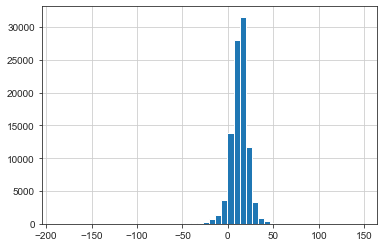

In [31]:
review_score["delivery_diff"].hist(bins=50);

In [32]:
review_score = sm.add_constant(review_score)

In [33]:
# OLS errored due to infs or nan. remove then
review_score = (review_score
                .replace([np.inf, -np.inf], np.nan)
                .dropna())

In [34]:
# run OLS
rev_y = review_score["review_score"]
rev_x = review_score[["const", "delivery_diff"]]

rev_lr = sm.OLS(rev_y, rev_x).fit()

In [35]:
rev_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7554.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:29:51   Log-Likelihood:            -1.5817e+05
No. Observations:               96470   AIC:                         3.163e+05
Df Residuals:                   96468   BIC:                         3.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7377      0.006    606.021      0.000       3.726       3.750
delivery_diff     0.0343      0.000     86.916      0.000       0.033       0.035
==============================================================================
Omnibus:                    19324.613   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33264.195
Skew:                          -1.349   Prob(JB):                         0.00
Kurtosis:                       3.998   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Second Model: review_score as a function of multiple regressors

In [36]:
# run OLS
rev_y2 = review_score["review_score"]
rev_x2 = review_score[["const", "delivery_diff", "shipping_costs"]]

rev_lr2 = sm.OLS(rev_y2, rev_x2).fit()

In [37]:
rev_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4394.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:29:51   Log-Likelihood:            -1.5760e+05
No. Observations:               96470   AIC:                         3.152e+05
Df Residuals:                   96467   BIC:                         3.152e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8728      0.007    529.288      0.000       3.858       3.887
delivery_diff      0.0349      0.000     88.992      0.000       0.034       0.036
shipping_costs    -0.0063      0.000    -33.831      0.000      -0.007      -0.006
==============================================================================
Omnibus:                    18892.135   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32351.720
Skew:                          -1.312   Prob(JB):                         0.00
Kurtosis:                       4.078   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Third model

In [38]:
review_score = review_score.assign(picture_ratio=review_score["has_product_photo"] / review_score["order_size"])

In [39]:
# run OLS

rev_y3 = review_score["review_score"]
rev_x3 = review_score[["const", "delivery_diff", "shipping_costs", "picture_ratio"]]

rev_lr3 = sm.OLS(rev_y3, rev_x3).fit()

In [40]:
rev_lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2934.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:29:52   Log-Likelihood:            -1.5759e+05
No. Observations:               96470   AIC:                         3.152e+05
Df Residuals:                   96466   BIC:                         3.152e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7489      0.034    109.451      0.000       3.682       3.816
delivery_diff      0.0349      0.000     88.977      0.000       0.034       0.036
shipping_costs    -0.0063      0.000    -33.891      0.000      -0.007      -0.006
picture_ratio      0.1260      0.034      3.703      0.000       0.059       0.193
==============================================================================
Omnibus:                    18879.174   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32318.595
Skew:                          -1.312   Prob(JB):                         0.00
Kurtosis:                       4.077   Cond. No.                         395.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""